# 머신러닝 III

## 실습 과제
### 데이터셋을 활용한 비지도학습 모델 적용
1. 인터넷에서 자유롭게 데이터셋 확보
2. 데이터 탐색 및 전처리
    - 데이터셋을 로드하고, 결측치 처리, 인코딩, 표준화 등 전처리 과정을 진행
3. 모델 선택 및 학습
    - 배운 비지도 학습을 적용하여 모델 생성
        - K-평균 클러스터링 (K-Means Clustering) 
        - 계층적 군집 분석 (K-Means Clustering) 
        - DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 
        - 주성분 분석 (PCA, Principal Component Analysis) 
        - 아이소맵 (Isomap) 
        - t-SNE (t-Distributed Stochastic Neighbor Embedding) 
        - 연관 규칙 학습 (Association Rule Learning) 
4. 모델 평가 및 시각화
    - 시각화 등을 통해 모델 평가

# 쇼핑목 고객

### columns 설명
    - CustomerID : 고객 ID
    - Genre : 성별
    - Age: 나이
    - Annual Income(k$) : 연간 소득
    - Spending Score(1-100) : 지출 점수

### 데이터 전처리
1. 결측값 확인
2. 이상치 처리
3. 표준화(SrandardScaler)필요

In [309]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [369]:
# 데이터 로드
df = pd.read_csv('Mall_Customers.csv')

print('*'* 30)
print(f"데이터 구조 확인:\n{df.info()}")
print('*'* 30)
print(f"데이터 샘플 확인:\n{df.head()}")
print('*'* 30)
print(f"데이터 기초통계 확인:\n{df.describe()}")
print('*'* 30)
print(f'데이터 결측치 확인:\n{df.isnull().sum()}')

******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
데이터 구조 확인:
None
******************************
데이터 샘플 확인:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31            

In [372]:
# CustomerID 삭제
df.drop('CustomerID', axis = 1, inplace=True)

# 성멸 인코딩
df['Gender'] = df['Gender'].apply(lambda x:1 if x == 'Male' else 0)

# df 샘플 확인
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


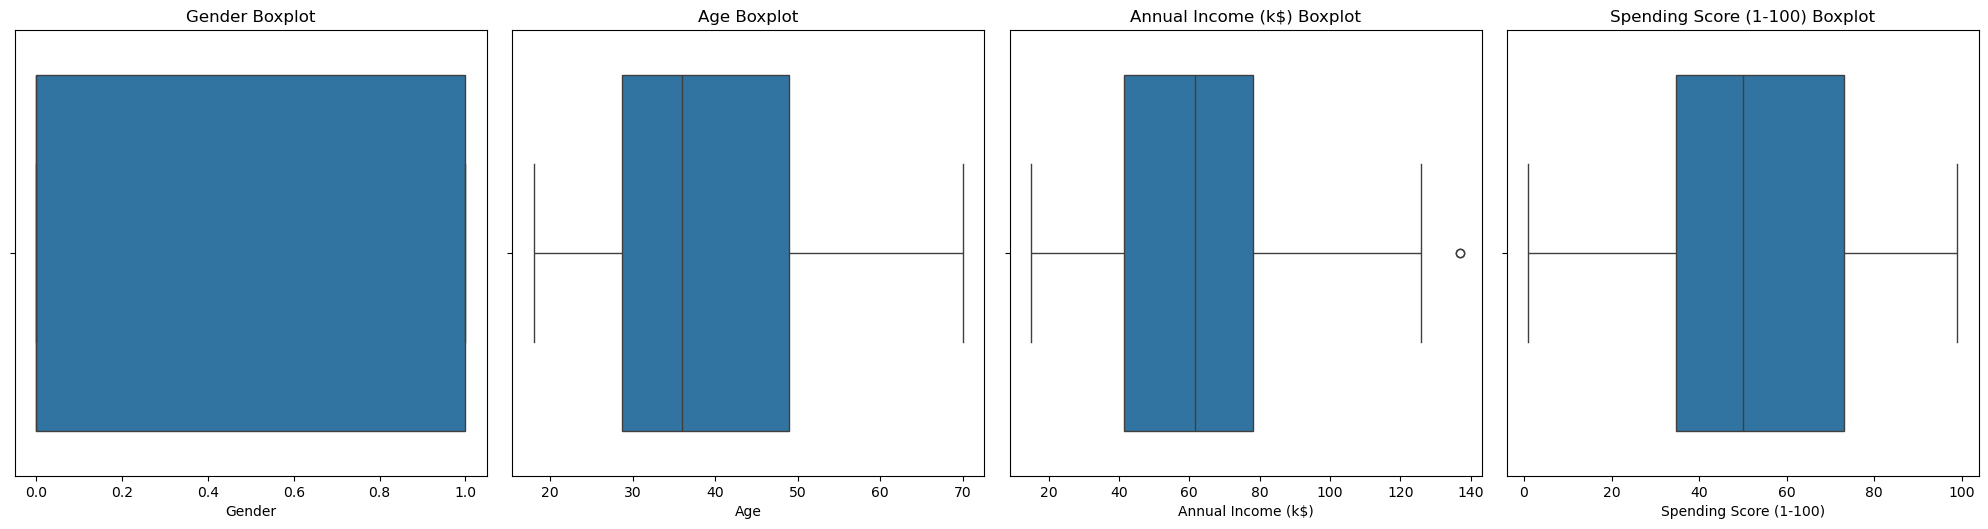

In [373]:
# 박스 플롯 그리는 함수(이상치 확인)
def drow_boxplots(df):
    columns = df.columns
    num_plots = len(columns)
    
    # 서브 플롯 생성
    fig, axes = plt.subplots(nrows=(num_plots//4)+1, ncols=4, figsize=(20,10))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'{col} Boxplot')
        
    # 남은 빈 플롯 제거
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
            
    plt.tight_layout()
    plt.show()

# 데이터 이상치 파악
drow_boxplots(df)

In [374]:
df_c = df.copy()

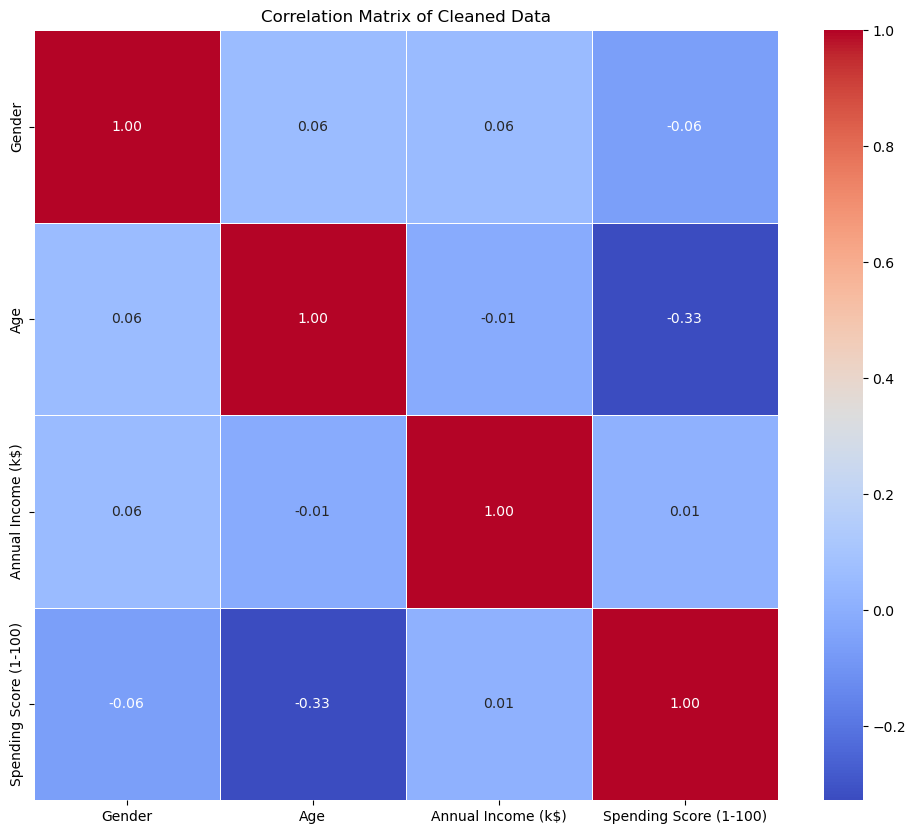

In [375]:
# 상관관계 행렬 계산 및 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Cleaned Data')
plt.show()

# 1. k-평균 클러스터링(K-Means Clustering)
    - 데이터를 K개의 군집으로 나누는 군집화 알고리즘
    - 데이터 포인트를 유사한 특성을 가진 그룹으로 묶어 데이터의 구조를 이해
    - 데이터 분석 및 시각화를 용이하게 함

    - 군집 수 K: 사용자가 군집 수 K를 사전에 정의, 모델의 성능과 직결되는 중요한 하이퍼파라미터
    - 거리 기반 알고리즘: 유클리드 거리를 사용하여 데이터 포인트 간의 유사성을 측정
    - 평균 중심: 각 군집의 중심은 해당 군집에 속한 데이터 포인트들의 평균 값으로 정의
    - 반복적 과정: 군집 할당과 중심 업데이트를 반복하여 최적의 군집을 찾음
    - 계산 효율성: 비교적 게산 효율성이 높아 대규모 데이터셋에서도 빠르게 동작

In [376]:
df_1 = df.copy()

In [356]:
#필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

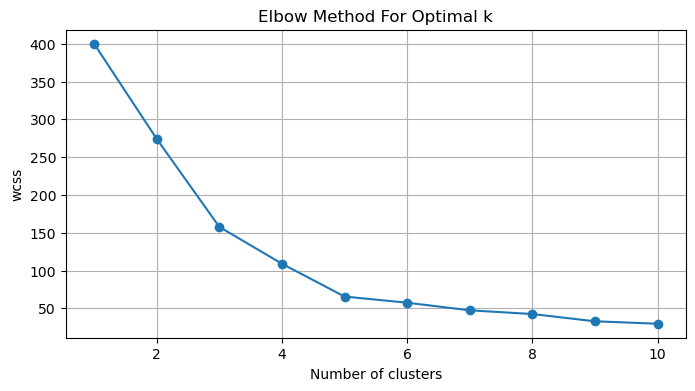

In [377]:
X = df.iloc[:,[2,3]].values
# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-평균 클러스터링의 최적 클러스터 수 결정 (엘보우 방법)
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# 엘보우 그래프 표시
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.grid(True)
plt.show()

In [382]:
kmeans_model= KMeans(n_clusters= 5, init= 'k-means++')
kmeans_model.fit(X_scaled)
y_kmeans= kmeans_model.predict(X_scaled)

y_kmeans

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [383]:
df['Cluster'] = y_kmeans
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,4
1,1,21,15,81,0
2,0,20,16,6,4
3,0,23,16,77,0
4,0,31,17,40,4


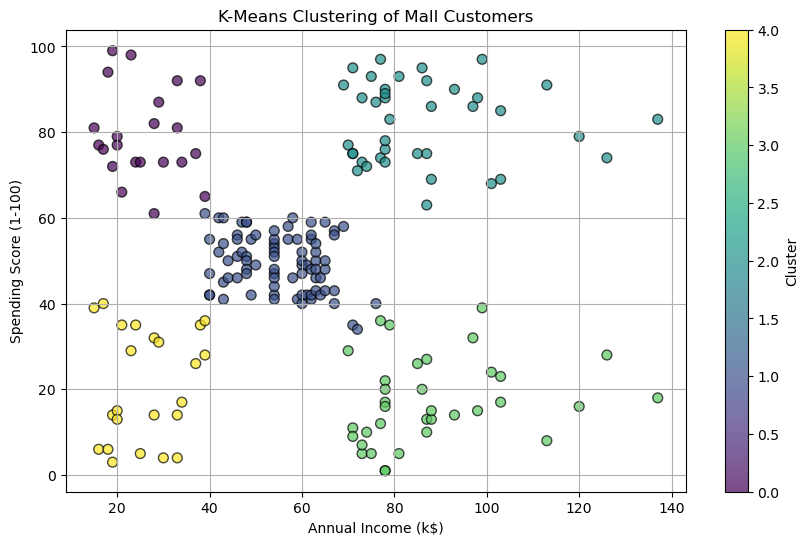

In [384]:
# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis', marker='o', edgecolor='black', s=50, alpha=0.7)
plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [385]:
# 데이터와 클러스터 레이블을 silhouette_score 함수에 전달
silhouette_avg = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], df['Cluster'])

# 실루엣 점수 출력
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.553931997444648


In [389]:
# 클러스터 중심점 출력
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print("Centroids of the clusters:")
print(centroid_df)

Centroids of the clusters:
   Annual Income (k$)  Spending Score (1-100)
0           55.296296               49.518519
1           86.538462               82.128205
2           25.727273               79.363636
3           88.200000               17.114286
4           26.304348               20.913043


# 2. 계층적 군집 분석 (Hierarchical Clustering)
    - 데이터 포인트들 간의 유사도를 바탕으로 계층적인 군집 구조를 형성하는 군집화 방법
    - 데이터를 트리 구조로 표현하여, 군집화를 단계별로 진행
    - 데이터를 계층적으로 분류하여, 데이터 간의 관계와 구조를 이해하는 데 도움

    - 병합적 군집화 (Agglomerative Clustering)
        - 데이터를 각가 하나의 군집으로 시작하여, 가장 가까운 군집들을 반복적으로 병합
        - 최종적으로 하나의 군집이 형성될 때까지 병합 과정을 반복
    - 분할적 군집화 (Divisive Clustering)
        - 모든 데이터를 하나의 군집으로 시작하여, 가장 큰 군집을 반복적으로 분할
        - 최종적으로 각 데이터가 하나의 군집을 형성할 때까지 분할 과정을 반복

Linkage Method: ward, Number of Clusters: 5, Silhouette Score: 0.5538
Linkage Method: single, Number of Clusters: 5, Silhouette Score: 0.2758
Linkage Method: complete, Number of Clusters: 5, Silhouette Score: 0.5531
Linkage Method: average, Number of Clusters: 5, Silhouette Score: 0.4794
Linkage Method: centroid, Number of Clusters: 5, Silhouette Score: 0.4794


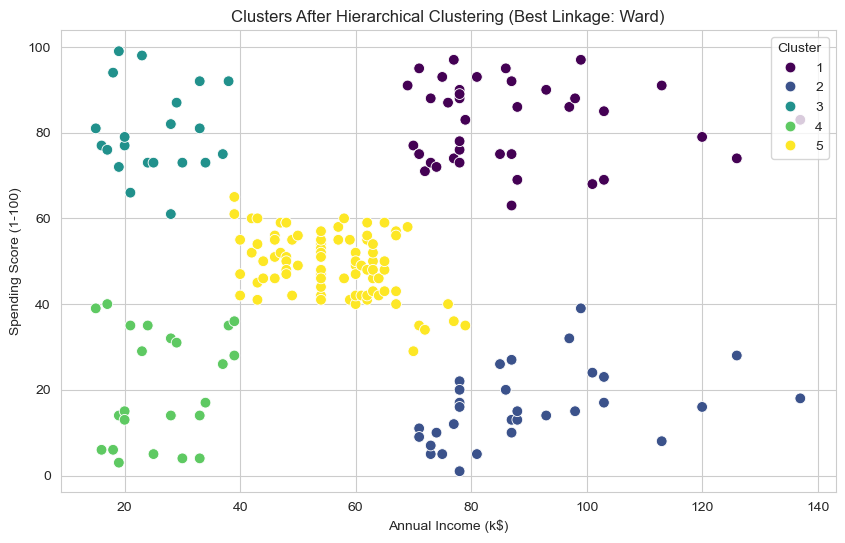

In [394]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

# 데이터 준비 및 스케일링
data_for_clustering = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# 다양한 링크 방법 테스트
linkage_methods = ['ward', 'single', 'complete', 'average', 'centroid']
best_silhouette_score = -1
best_linkage = None
best_clusters = None

# 각 링크 방법에 대한 계층적 클러스터링 및 실루엣 점수 계산
for method in linkage_methods:
    linkage_matrix = linkage(scaled_data, method=method)
    num_clusters = 5  # 사용할 클러스터의 수
    clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(scaled_data, clusters)

    # 결과 출력
    print(f"Linkage Method: {method}, Number of Clusters: {num_clusters}, Silhouette Score: {silhouette_avg:.4f}")
    
    # 최고 실루엣 점수 업데이트
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_linkage = method
        best_clusters = clusters

# 데이터프레임에 최적의 클러스터 할당
df['BestCluster'] = best_clusters

# 최적 클러스터 시각화
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='BestCluster', palette='viridis', s=60)
plt.title(f"Clusters After Hierarchical Clustering (Best Linkage: {best_linkage.capitalize()})")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.legend(title='Cluster', loc='upper right')
plt.show()

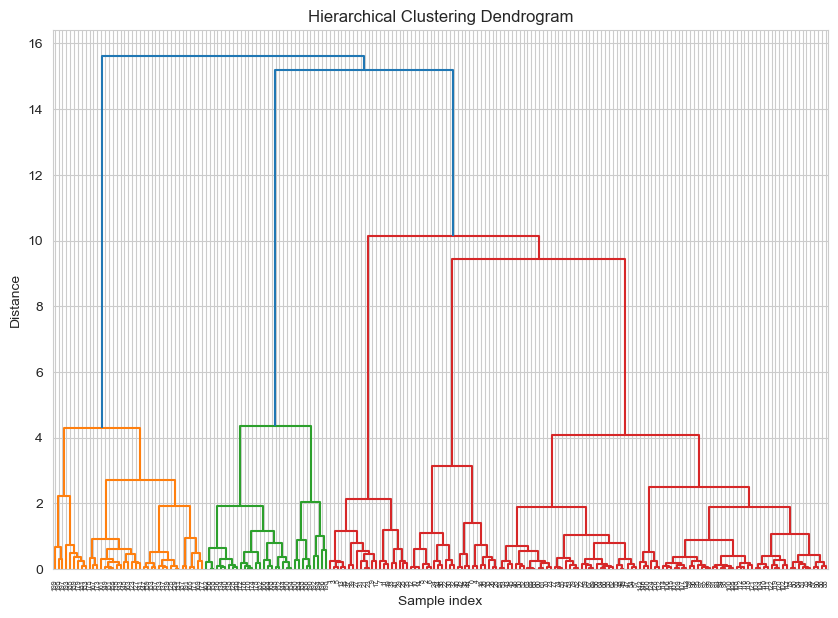

In [395]:
# 최적의 링크 방법을 사용하여 계층적 클러스터링 수행
best_linkage_method = 'ward'  # 예를 들어 'ward' 방법이 최적이라고 가정
linkage_matrix = linkage(scaled_data, method=best_linkage_method)

# 덴드로그램 그리기
plt.figure(figsize=(10, 7))  # 덴드로그램의 크기 설정
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# 3. DBSCAN
    - Density-Based Spatial Clustering of Applications with Noise
    - 밀도 기반의 군집화 알고리즘
    - 밀집된 영역은 군집으로 식별하고, 밀도가 낮은 데이터 포이트는 노이즈로 간주
    - 데이터의 밀집 영역을 찾아내고, 군집의 크기나 형태에 구애받지 않는 유연한 군집화를 수행하는 것이 목표

    - 밀도 기반 군집화: 데이터 포인트의 밀도를 기준으로 군집을 형성
    - 노이즈 처리: 밀도가 낮은 데이터 포인트를 노이즈로 간주하고, 군집에서 제외
    - 유연한 군집 형성: 군집의 크기나 형태에 구애받지 않고 유연하게 군집을 형성
    - 비교적 간단한 구현: 알고리즘이 비교적 간단하고, 구현이 용이

In [499]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product


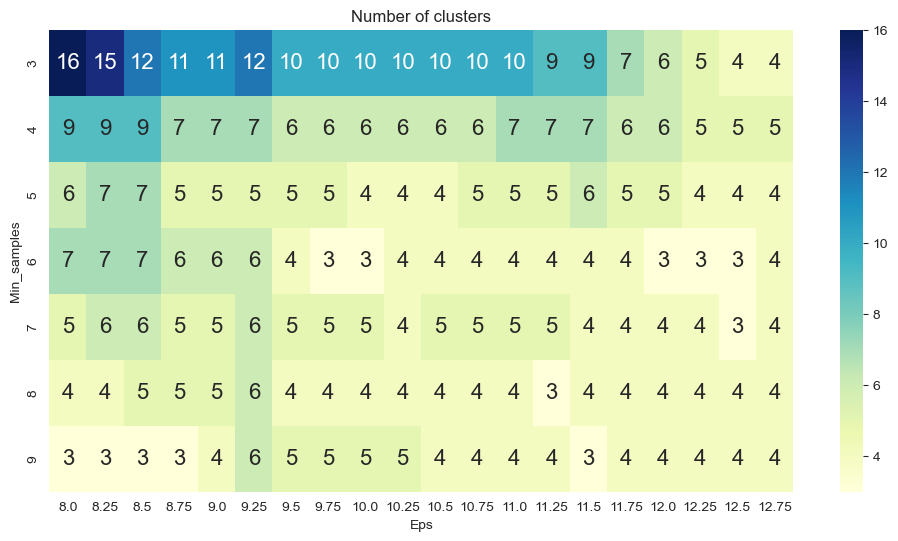

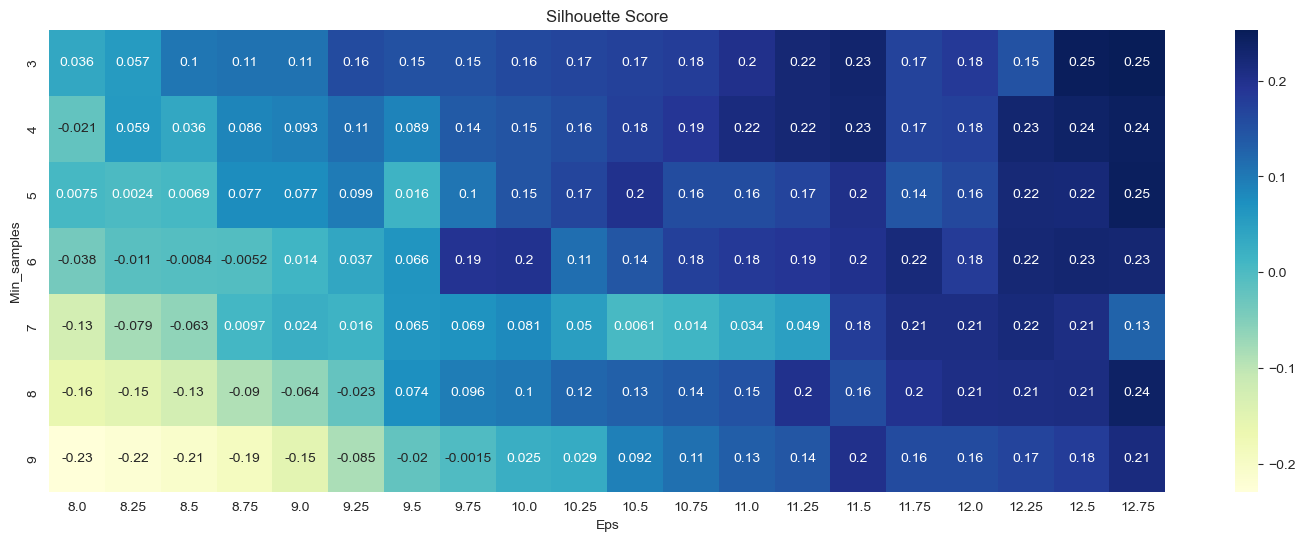

In [519]:
# DBSCAN 파라미터 탐색 범위 설정
eps_values = np.arange(8, 13, 0.25)  # eps values to be investigated
min_samples = np.arange(3, 10)  # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))  # 파라미터 조합 생성

# 클러스터링 결과 저장할 리스트
no_of_clusters = []  # 클러스터 개수 저장 리스트
sil_score = []  # 실루엣 점수 저장 리스트

# 각 파라미터 조합별 DBSCAN 클러스터링 수행 및 결과 저장
for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df)
    labels = DBS_clustering.labels_
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # 노이즈 제외
    no_of_clusters.append(n_clusters)
    
    if n_clusters > 1:  # 실루엣 점수는 하나의 클러스터만 있을 경우 계산 불가
        score = silhouette_score(df, labels)
    else:
        score = -1  # 계산 불가한 경우 -1로 설정
    sil_score.append(score)

# 결과를 데이터프레임으로 변환하여 저장
tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
tmp['Sil_score'] = sil_score

# 클러스터 개수 결과를 피봇 테이블로 변환하여 히트맵으로 시각화
pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

# 실루엣 점수 결과를 피봇 테이블로 변환하여 히트맵으로 시각화
pivot_2 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_2, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
ax.set_title('Silhouette Score')
plt.show()



In [520]:
# 최적의 클러스터링 조건에서 DBSCAN 재수행 (예시: eps=12.5, min_samples=4)
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(df)

# 클러스터 레이블을 데이터에 추가
DBSCAN_clustered = df.copy()
DBSCAN_clustered.loc[:, 'Cluster'] = DBS_clustering.labels_  # append labels to points

# 클러스터 크기 계산
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,24
0,111
1,8
2,33
3,20
4,4


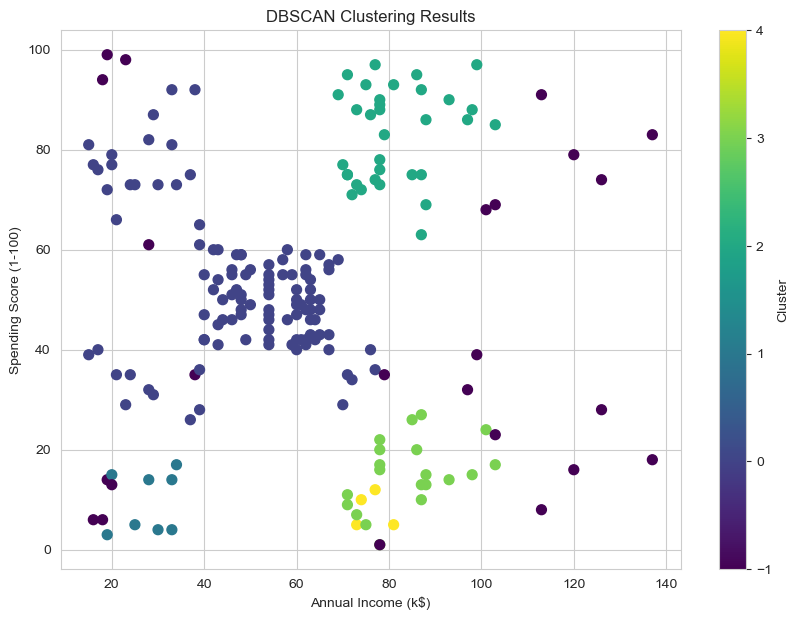

In [521]:
# 데이터 피처에 따른 클러스터링 결과 시각화
plt.figure(figsize=(10, 7))
plt.scatter(DBSCAN_clustered['Annual Income (k$)'], DBSCAN_clustered['Spending Score (1-100)'], c=DBSCAN_clustered['Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering Results')
plt.show()

# 4. 주성분 분석(PCA)
    - 고차원 데이터를 저차원으로 변화하여 데이터의 주요 변동성을 보존하는 차원 축소 기법
    - 데이터의 분산을 최대화하는 직교 축을 찾아 데이터를 새로운 좌표계로 변환하여 노이즈를 줄이고 시각화 및 해석 용이
    - 데이터 시각화, 노이즈 제거, 데이터 압축 등의 목적을 위해 사용

    - 분산 최대화: PCA는 데이터의 분산을 최대화하는 방향으로 새로운 축 탐색
    - 직교 축: 주성분은 서로 직교(orthogonal)하는 축으로 구성
    - 순서 중요: 첫 번째 주성분은 가장 큰 분산을 가지며, 두 번째 주성분은 그 다음으로 큰 분산을 가짐
    - 데이터 변환: 고유벡터를 사용하여 데이터를 새로운 좌표계로 변환

In [527]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

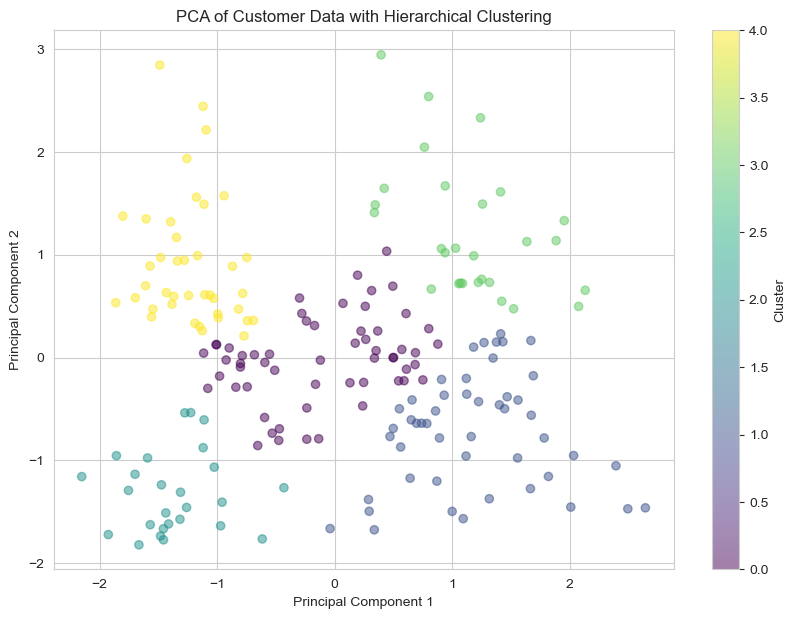

In [528]:
# 데이터 준비 및 스케일링
X = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_for_clustering)

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 계층적 클러스터링
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = clustering.fit_predict(X_pca)

# PCA 결과 시각화
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Customer Data with Hierarchical Clustering')
plt.colorbar(scatter, label='Cluster')
plt.show()


# 5. 아이소맵 (Isomap)
    - 최근접 이웃 그래프 구성(Constructing Nearest Neighbor Graph)
        - 각 데이터 포인트에 대해, k개의 최근접 이웃 탐색
        - 최근접 이웃들 간의 연결을 통해 그래프를 구성

- 지오데식 거리 계산(Calculating Geodesic Distances)
    - 그래프 내의 모든 데이터 포인트 쌍 간의 최단 경로를 계산하여 지오데식 거리를 측정
    - 최단 경로 알고리즘(예: 다익스트라 알고리즘)을 사용하여 각 포인트 간의 지오데식 거리를 계산

- 다차원 척도법(Multidimensional Scaling, MDS)
    - 지오데식 거리 행렬을 입력으로 받아, 저차원 임베딩을 생성
    - MDS는 입력 거리 행렬을 보존하는 방식으로 저차원 공간에서 데이터 포인트를 배치    

In [529]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/pyt

2,2 Scors :0.4730779373585565
2,3 Scors :0.43814669998570394


/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/pyt

2,4 Scors :0.4301918423201465
3,2 Scors :0.4369940620216098
3,3 Scors :0.5941868519432534
3,4 Scors :0.5631861154791552
4,2 Scors :0.43436605703374065
4,3 Scors :0.6299548877165714


/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/pyth

4,4 Scors :0.6091763262615398
5,2 Scors :0.5147887679187761
5,3 Scors :0.6487671957583107
5,4 Scors :0.6265154698469735


/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self.

6,2 Scors :0.6118392251531481
6,3 Scors :0.6536275620502416
6,4 Scors :0.6287156514412033
7,2 Scors :0.604826025092675
7,3 Scors :0.6530979606048316
7,4 Scors :0.6277950392579755
8,2 Scors :0.6072940956073484
8,3 Scors :0.6596864142305003


/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self.

8,4 Scors :0.6341169119256895
9,2 Scors :0.6116459206962298
9,3 Scors :0.6573437191448877
9,4 Scors :0.6314248039941827


/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/opt/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self.

10,2 Scors :0.6124469948645715
10,3 Scors :0.659109502619558
10,4 Scors :0.632666223814453
11,2 Scors :0.6056610838637373
11,3 Scors :0.6448766528178261
11,4 Scors :0.6185181951970112
12,2 Scors :0.6057794561845011
12,3 Scors :0.6420822749880507
12,4 Scors :0.6154160911088566
13,2 Scors :0.6080549033557684
13,3 Scors :0.6389218253133573
13,4 Scors :0.6109136992334939
14,2 Scors :0.5952125003971989
14,3 Scors :0.615600905441061
14,4 Scors :0.5861772259781252
Best Params: {'n_neighbors': 8, 'n_components': 3}
Best Silhouette Score: 0.6596864142305003


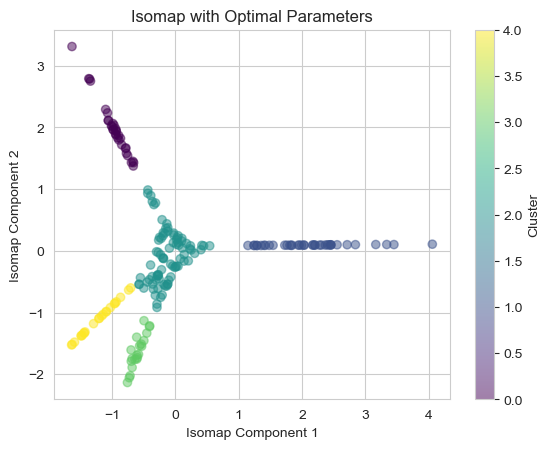

In [534]:
# 데이터 준비 및 스케일링
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 계층적 클러스터링 수행
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Cluster_Labels'] = clustering.fit_predict(X_scaled)  # 클러스터 레이블을 데이터프레임에 추가

# 파라미터 범위 설정
n_neighbors_options = range(2, 15)
n_components_options = range(2, 5)
best_score = -1

for n_neighbors in n_neighbors_options:
    for n_components in n_components_options:
        isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors)
        X_isomap = isomap.fit_transform(X_scaled)
        score = silhouette_score(X_isomap, df['Cluster_Labels'])  # Cluster_Labels는 사전에 클러스터링된 레이블
        print(f'{n_neighbors},{n_components} Scors :{score}')
        
        if score > best_score:
            best_score = score
            best_params = {'n_neighbors': n_neighbors, 'n_components': n_components}
            best_isomap = X_isomap

# 최적 파라미터 출력 및 시각화
print("Best Params:", best_params)
print("Best Silhouette Score:", best_score)

plt.scatter(best_isomap[:, 0], best_isomap[:, 1], c=df['Cluster_Labels'], cmap='viridis', alpha=0.5)
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.title('Isomap with Optimal Parameters')
plt.colorbar(label='Cluster')
plt.show()

# 5. t-SNE
    - t-Distributed Stochastic Neighbor Embedding
    - 고차원 데이터를 저차원 공간에 효과적으로 시각화하기 위해 개발된 비선형 차우너 축소 기법
    - 고차원 데이터의 클러스터링 구조를 시각적으로 표현하는 데 사용
    - 데이터 포인트 간의 지역적 유사성을 보존하는 데 강력한 성능

    - 비선형 차원 축소: 고차원 데이터의 비선형 구조를 저차원에서 보존
    - 지역적 유사성 보존: 데이터 포인트 간의 지역적 유사성을 유지
    - 확률 기반 접근: 데이터 포인트 간의 거리 정보를 확률로 변환하여 차원을 축소합니다
    - KL 발산 최소화: 고차원과 저차원 간의 확률 분포 차이를 최소화하여 최적의 저차원 임베딩 탐색

In [539]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

5,10 score : 0.5308489799499512
5,50 score : 0.5574102997779846
5,100 score : 0.5321655869483948
5,200 score : 0.5619634389877319
5,500 score : 0.38074246048927307
10,10 score : 0.6121307611465454
10,50 score : 0.6281780004501343
10,100 score : 0.652397632598877
10,200 score : 0.6297154426574707
10,500 score : 0.3690066933631897
20,10 score : 0.6361569762229919
20,50 score : 0.6257604360580444
20,100 score : 0.6200103163719177
20,200 score : 0.6196425557136536
20,500 score : 0.6196684837341309
30,10 score : 0.6068838238716125
30,50 score : 0.6044338345527649
30,100 score : 0.6081371307373047
30,200 score : 0.6061308979988098
30,500 score : 0.6030389666557312
50,10 score : 0.6002172827720642
50,50 score : 0.6006548404693604
50,100 score : 0.6102575063705444
50,200 score : 0.6123858690261841
50,500 score : 0.6169182062149048
Best Params: {'perplexity': 10, 'learning_rate': 100}
Best Silhouette Score: 0.65239763


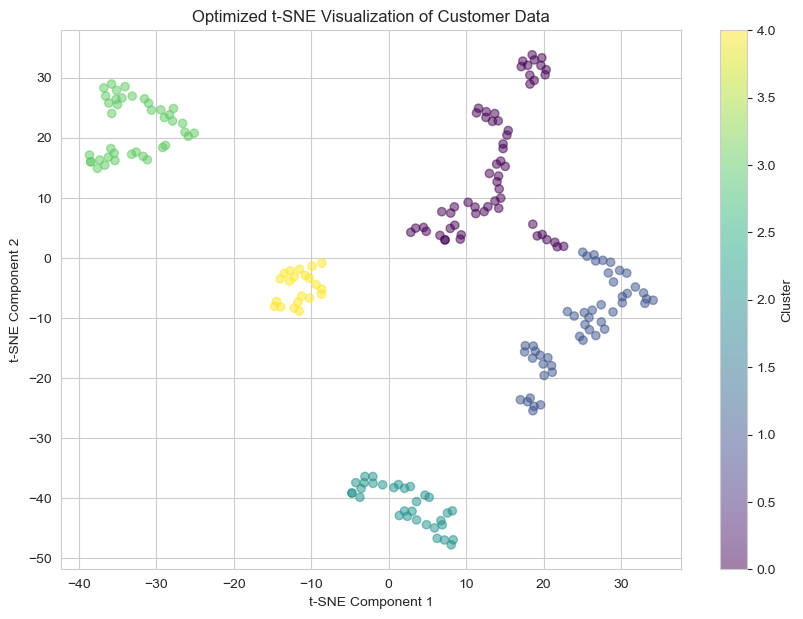

In [540]:
# 데이터 준비 및 스케일링
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# t-SNE 파라미터 범위 설정
perplexity_values = [5, 10, 20, 30, 50]
learning_rates = [10, 50, 100, 200, 500]
n_iter = 1000
best_score = -1

# t-SNE 최적화
for perplexity in perplexity_values:
    for learning_rate in learning_rates:
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=42)
        X_tsne = tsne.fit_transform(X_scaled)
        # 계층적 클러스터링 수행
        clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
        cluster_labels = clustering.fit_predict(X_tsne)
        score = silhouette_score(X_tsne, cluster_labels)
        print(f'{perplexity},{learning_rate} score : {score}')
        
        if score > best_score:
            best_score = score
            best_params = {'perplexity': perplexity, 'learning_rate': learning_rate}
            best_tsne = X_tsne
            best_clusters = cluster_labels

# 최적 파라미터 출력 및 시각화
print("Best Params:", best_params)
print("Best Silhouette Score:", best_score)

plt.figure(figsize=(10, 7))
plt.scatter(best_tsne[:, 0], best_tsne[:, 1], c=best_clusters, cmap='viridis', alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Optimized t-SNE Visualization of Customer Data')
plt.colorbar(label='Cluster')
plt.show()